In [200]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import sklearn.metrics as metrics

In [201]:
#Unión de los archivos con sus respectivas categorías de búsqueda

files = {
    'juguetes':'mla1132_meli.csv',
    'elementos de fotografia': 'mla1039_meli.csv',
    'cuidado de la piel': 'mla1246_meli.csv',
    'accesorios' : 'mla3937_meli.csv',
    'herramientas' : 'mla407134_meli.csv'}

out_df = pd.DataFrame()
for key,value in files.items():
    df = pd.read_csv(f'./Data/{value}')
    df['Categoria']=key
    out_df = pd.concat([out_df, df])

out_df.to_csv(f'./Data/Categorias_complete.csv', index=False)

In [202]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19991 entries, 0 to 3996
Data columns (total 48 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   id                                                                 19991 non-null  object 
 1   title                                                              19991 non-null  object 
 2   thumbnail_id                                                       19991 non-null  object 
 3   listing_type_id                                                    19991 non-null  object 
 4   permalink                                                          19991 non-null  object 
 5   category_id                                                        19991 non-null  object 
 6   domain_id                                                          19991 non-null  object 
 7   order_backend          

In [203]:
out_df.head()

,id,title,thumbnail_id,listing_type_id,permalink,category_id,domain_id,order_backend,price,sold_quantity,...,seller__seller_reputation__metrics__cancellations__value,installments__quantity,installments__amount,installments__rate,days_remaining,years_active,Categoria,seller__car_dealer,seller__car_dealer_logo,variation_filters
0,MLA1112140771,Pileta Inflable Redonda Bestway Kiddie Lounge ...,623284-MLA53605777143_022023,gold_pro,https://www.mercadolibre.com.ar/pileta-inflabl...,MLA11226,MLA-INFLATABLE_POOLS,1,1692.9,250,...,0,6.0,282.15,0.00,6833,4,juguetes,NaN,NaN,NaN
1,MLA1275803410,Cry Babies Fantasy Dreamy Imc Toys 99180im,843969-MLA48269133730_112021,gold_special,https://www.mercadolibre.com.ar/cry-babies-fan...,MLA2968,MLA-DOLLS,2,15990.0,200,...,135,6.0,3953.53,48.35,7223,4,juguetes,NaN,NaN,NaN
2,MLA1109575910,Juego De Cartas Desconectados En Palabras,633026-MLA48408537360_122021,gold_special,https://www.mercadolibre.com.ar/juego-de-carta...,MLA1161,MLA-BOARD_GAMES,3,6499.0,5000,...,1,6.0,1606.88,48.35,6815,2,juguetes,NaN,NaN,NaN
3,MLA1110677111,Juego De Mesa Código Secreto Czech Games Editi...,960516-MLA44936648183_022021,gold_special,https://www.mercadolibre.com.ar/juego-de-mesa-...,MLA1161,MLA-BOARD_GAMES,4,9500.0,250,...,5,6.0,2348.88,48.35,6822,16,juguetes,NaN,NaN,NaN
4,MLA1240728057,Bellies Bebe Interactivo Beth Edic Especial In...,994457-MLA49925702800_052022,gold_special,https://www.mercadolibre.com.ar/bellies-bebe-i...,MLA2968,MLA-DOLLS,5,21900.0,0,...,28,6.0,5414.78,48.35,7200,10,juguetes,NaN,NaN,NaN


## EDA

In [204]:
out_df.columns

Index(['id', 'title', 'thumbnail_id', 'listing_type_id', 'permalink',
       'category_id', 'domain_id', 'order_backend', 'price', 'sold_quantity',
       'available_quantity', 'tags', 'shipping__logistic_type',
       'shipping__mode', 'shipping__store_pick_up', 'shipping__free_shipping',
       'shipping__tags', 'seller__id', 'seller__nickname', 'seller__tags',
       'seller__seller_reputation__level_id',
       'seller__seller_reputation__power_seller_status',
       'seller__seller_reputation__transactions__canceled',
       'seller__seller_reputation__transactions__completed',
       'seller__seller_reputation__transactions__ratings__negative',
       'seller__seller_reputation__transactions__ratings__neutral',
       'seller__seller_reputation__transactions__ratings__positive',
       'seller__seller_reputation__transactions__total',
       'seller__seller_reputation__metrics__sales__period',
       'seller__seller_reputation__metrics__sales__completed',
       'seller__seller_r

/var/folders/ms/v5w4mc3d0nscpg3rdtjqm5200000gp/T/ipykernel_5474/1095161962.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax=plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])


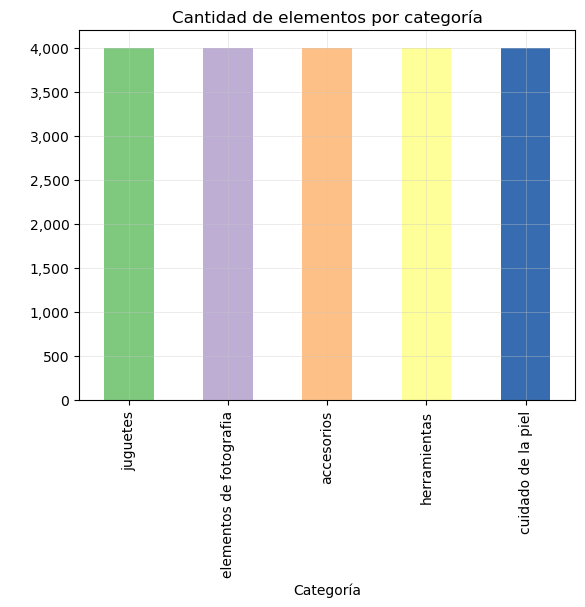

In [205]:
c=['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0']
ax=out_df['Categoria'].value_counts().plot(kind = 'bar', title='Cantidad de elementos por categoría', color= c,xlabel='Categoría', ylabel=' ',)
ax=plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
ax=plt.grid(color='#c7c7c7', linewidth=0.5, axis='both', alpha=0.5)

In [206]:
#AutoEDA

from pandas_profiling import ProfileReport

prof = ProfileReport(out_df)
prof.to_file(output_file='eda_output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/sofiaforni/opt/anaconda3/envs/DH/lib/python3.10/site-packages/multimethod/__init__.py:209: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  return self[tuple(map(self.get_type, args))](*args, **kwargs)
/Users/sofiaforni/opt/anaconda3/envs/DH/lib/python3.10/site-packages/pandas_profiling/model/correlations.py:67: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'cannot reindex on an axis with duplicate labels')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [207]:
#Eliminamos las columnas que hacen referencias a cuestiones vinculadas al vendedor

regex= re.compile('^seller__')
seller_columns= list(filter(regex.match, columns))
print(seller_columns)

['seller__id', 'seller__nickname', 'seller__tags', 'seller__seller_reputation__level_id', 'seller__seller_reputation__power_seller_status', 'seller__seller_reputation__transactions__canceled', 'seller__seller_reputation__transactions__completed', 'seller__seller_reputation__transactions__ratings__negative', 'seller__seller_reputation__transactions__ratings__neutral', 'seller__seller_reputation__transactions__ratings__positive', 'seller__seller_reputation__transactions__total', 'seller__seller_reputation__metrics__sales__period', 'seller__seller_reputation__metrics__sales__completed', 'seller__seller_reputation__metrics__claims__period', 'seller__seller_reputation__metrics__claims__rate', 'seller__seller_reputation__metrics__claims__value', 'seller__seller_reputation__metrics__delayed_handling_time__period', 'seller__seller_reputation__metrics__delayed_handling_time__rate', 'seller__seller_reputation__metrics__delayed_handling_time__value', 'seller__seller_reputation__metrics__cancellat

In [208]:
out_df.drop(columns=seller_columns, inplace=True)

In [209]:
#Creamos dummies para las variables categoricas que usaremos

out_df = pd.get_dummies(out_df, columns=['domain_id', 'listing_type_id', 'shipping__logistic_type', 'shipping__mode', 'shipping__tags', 'variation_filters'])

In [210]:
#Eliminamos valores faltantes

out_df.dropna(inplace=True)

## Premodel

In [211]:
# Separamos las variables independientes de la target
X=out_df.drop(columns=['Categoria', 'id', 'title', 'thumbnail_id', 'permalink', 'order_backend', 'tags', 'category_id'])
y=out_df['Categoria']

# Dividimos los datos en el set de train y el de test: 
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13990, 926)

(5997, 926)

(13990,)

(5997,)

In [213]:
class FeatureSelection(BaseEstimator, TransformerMixin):
    
    def __init__(self,selected_features):
        self.selected_features=selected_features
    
    def fit(self,X,y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.selected_features]

In [214]:
selector=FeatureSelection(selected_features=X.columns.values)

In [215]:
pasos = [('feature_engineering',selector),
         ('preprocesamiento', MinMaxScaler()), 
         ('clasificador', AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),algorithm='SAMME', n_estimators=150))]

pipe=Pipeline(pasos)

In [216]:
param_grid = [{'feature_engineering':[selector, None],
               'preprocesamiento':[StandardScaler(), MinMaxScaler(), None],
               'clasificador':[AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),algorithm='SAMME', n_estimators=150)]}] #list(np.linspace(0,1000,100)

In [217]:
folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

In [218]:
grid = GridSearchCV(pipe, param_grid, cv=folds)
grid.fit(X_train, y_train)